<a href="https://colab.research.google.com/github/TanushGoel/Machine-Learning-Playground/blob/master/DengAI_Predicting_Disease_Spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.options.mode.use_inf_as_na = False
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
data = pd.read_csv('dengai_disease_train_time_series.csv')
data.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,32993,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,33000,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,33007,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,33014,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,33021,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,33028,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,33035,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,33042,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,33049,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,33056,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [0]:
data['city'] = data.city.map({'sj':0, 'iq':1})
data_labels = data.total_cases

In [0]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,1990,18,32993,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,1990,19,33000,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,1990,20,33007,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,1990,21,33014,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,1990,22,33021,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [0]:
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       4
reanalysis_air_temp_k                      1
reanalysis_avg_temp_k                      1
reanalysis_dew_point_temp_k                1
reanalysis_max_air_temp_k                  1
reanalysis_min_air_temp_k                  1
reanalysis_precip_amt_kg_per_m2            1
reanalysis_relative_humidity_percent       1
reanalysis_sat_precip_amt_mm               4
reanalysis_specific_humidity_g_per_kg      1
reanalysis_tdtr_k                          1
station_avg_temp_c                        34
station_diur_temp_rng_c                   34
station_max_temp_c                        11
station_mi

In [0]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,1990,18,32993,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,1990,19,33000,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,1990,20,33007,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,1990,21,33014,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,1990,22,33021,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [0]:
data_labels.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [0]:
data_test = pd.read_csv('dengai_disease_test_time_series.csv')
data_test = data_test.drop('Unnamed: 24', axis=1)
data_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,39567,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,39574,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,39581,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,39588,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,39595,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [0]:
data_test.city = data_test.city.map({'sj':0, 'iq':1})

In [0]:
data_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,2008,18,39567,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,0,2008,19,39574,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,0,2008,20,39581,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,0,2008,21,39588,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,0,2008,22,39595,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


Text(0.5, 1, 'Variable Correlations')

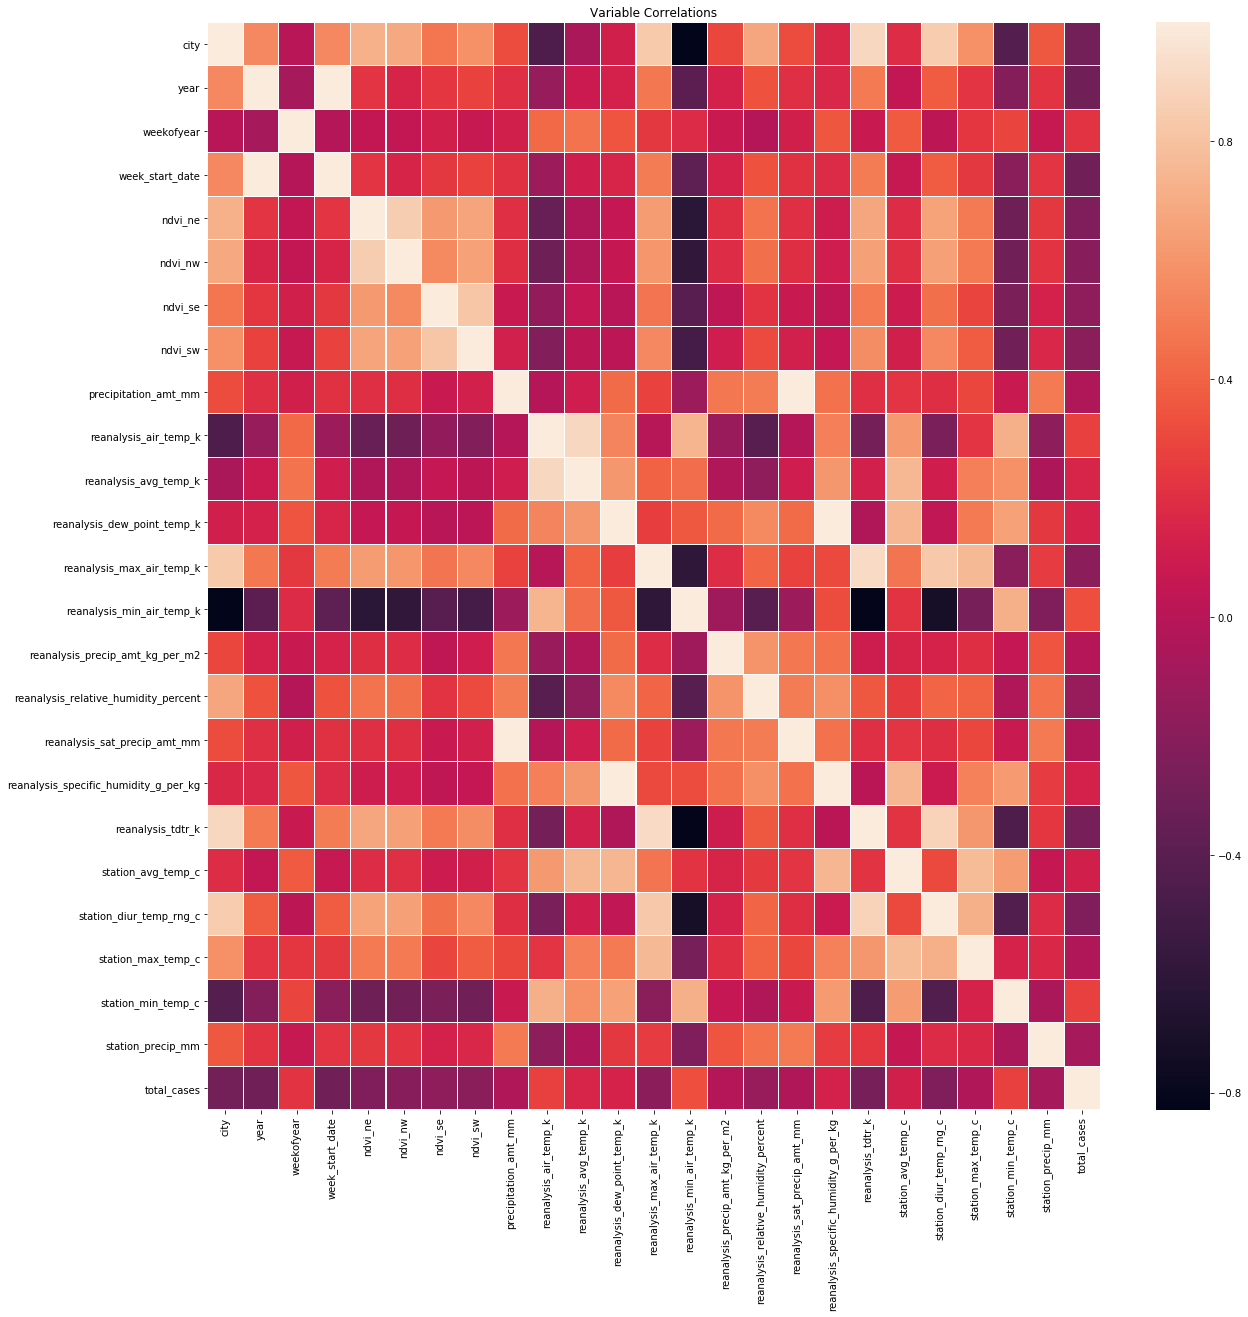

In [0]:
import seaborn as sns
correlations = data.corr()
fig, ax = plt.subplots(figsize=(20,20))
corr_heat = sns.heatmap(correlations, linewidths=0.125, ax=ax)
plt.title('Variable Correlations')

Text(0.5, 0, 'Time')

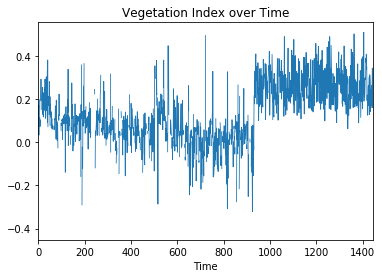

In [0]:
data.ndvi_ne.plot.line(lw=0.8)
plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

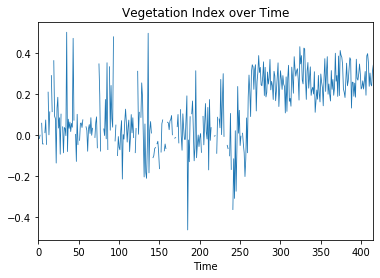

In [0]:
data_test.ndvi_ne.plot.line(lw=0.8)
plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [0]:
# Since these are time-series, we can see the gaps where there are NaNs by plotting the data
# Since we can't build a model without those values, we'll take a simple approach and just fill those values with the most recent value that we saw up to that point

data.fillna(method='ffill', inplace=True)
data_test.fillna(method='ffill', inplace=True)

In [0]:
data.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [0]:
data_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [0]:
data = reduce_mem_usage(data)

Memory usage of dataframe is 0.28 MB
Memory usage after optimization is: 0.07 MB
Decreased by 75.0%


In [0]:
data_test = reduce_mem_usage(data_test)

Memory usage of dataframe is 0.08 MB
Memory usage after optimization is: 0.02 MB
Decreased by 74.9%


Text(0.5, 1, 'Variable Correlations')

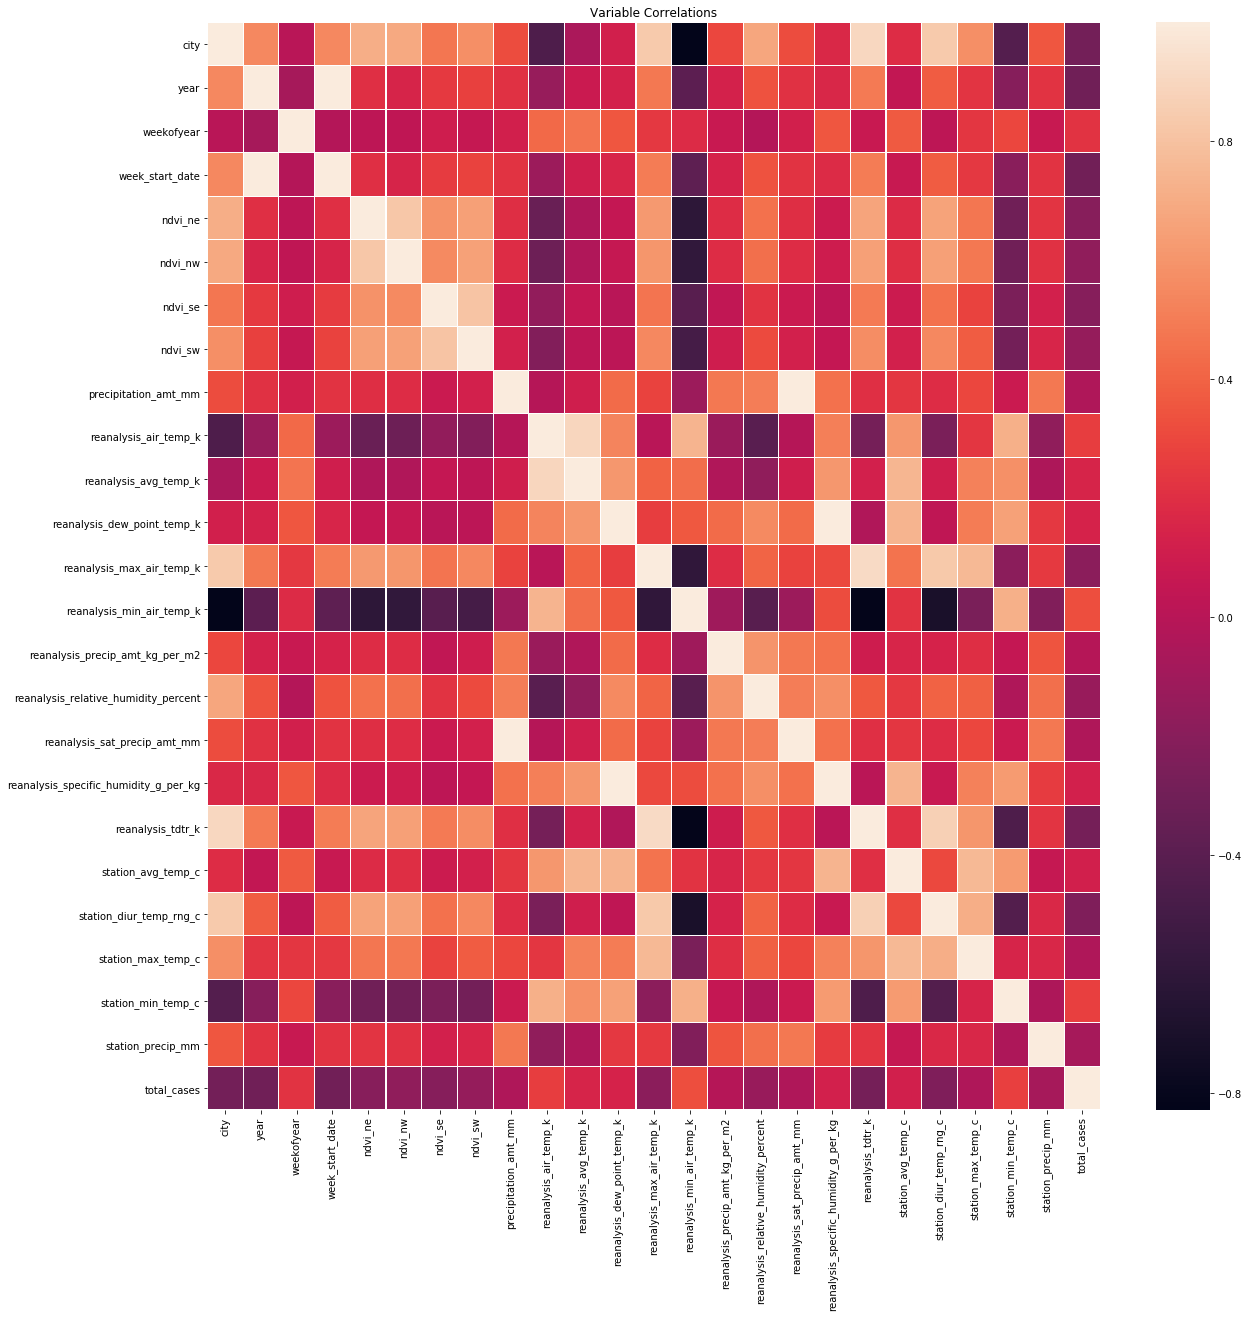

In [0]:
import seaborn as sns
correlations = data.corr()
fig, ax = plt.subplots(figsize=(20,20))
corr_heat = sns.heatmap(correlations, linewidths=0.125, ax=ax)
plt.title('Variable Correlations')

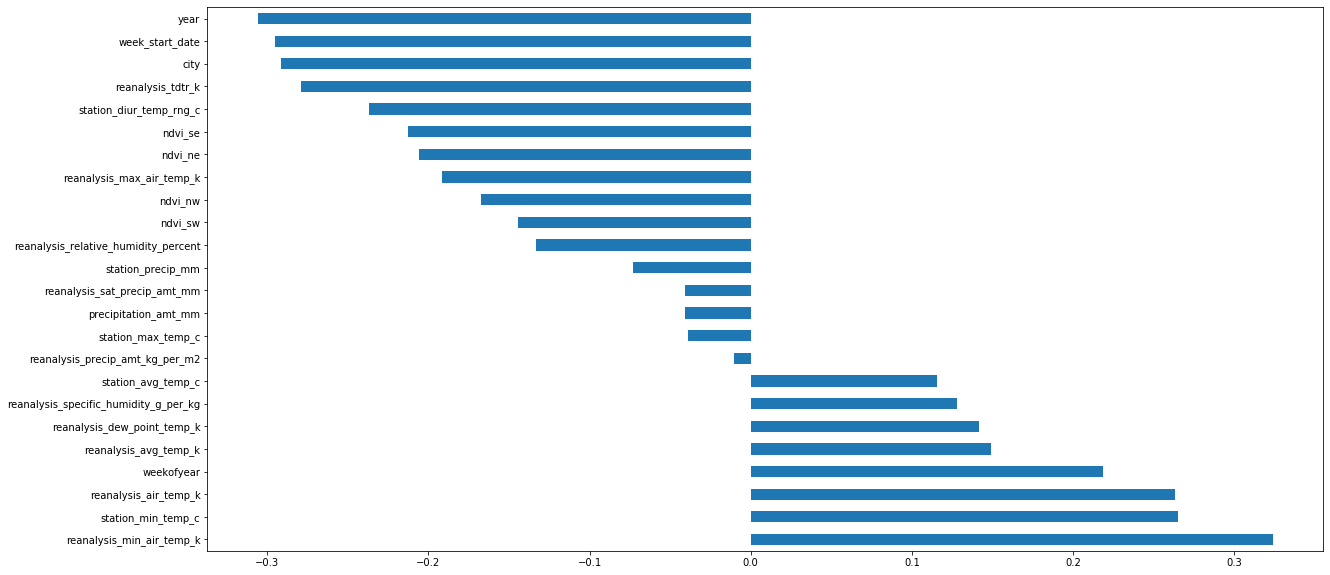

In [0]:
plt.subplots(figsize=(20,10))
correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()

In [0]:
data_features = data.drop('total_cases', axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data_features, data_labels, test_size=0.01, random_state=42)

In [0]:
print('Train:', X_train.shape[0])
print('Valid:', X_valid.shape[0])

Train: 1432
Valid: 15


In [0]:
# DO NOT USE CATBOOST
# NOT GOOD FOR TIME SERIES

!pip -q install catboost
from catboost import Pool
from catboost import CatBoostRegressor

In [0]:
train_pool = Pool(X_train, y_train)
cat_clf = CatBoostRegressor(loss_function='RMSE', boosting_type='Ordered', bootstrap_type='Bayesian', od_type='Iter', iterations=25000, eval_metric='RMSE', random_state=42)
cat_clf.fit(train_pool, eval_set=(X_valid, y_valid), early_stopping_rounds=5000, verbose=100)
cat_clf.best_score_

In [0]:
cat_clf.save_model('DengAI_Catboost.hdf5')

In [0]:
feature_stuff = pd.DataFrame(zip(cat_clf.feature_names_, cat_clf.feature_importances_))
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x=1, y=0, data=feature_stuff, label="Total")

In [0]:
#data_test.city = data_test.city.map({'sj':0, 'iq':1})
Y_pred_cat = cat_clf.predict(data_test)
Y_pred = np.round(Y_pred_cat).astype(int)
Y_preds = []
for i in Y_pred:
  if i<0:
    print('PREDICTION UNDER 0 -> ', i)
    Y_preds.append(0)
  else:
    Y_preds.append(i)

In [0]:
data_test.city = data_test.city.map({0:'sj', 1:'iq'})
submission = pd.DataFrame({
    "city": data_test["city"], 
    "year": data_test["year"], 
    "weekofyear": data_test["weekofyear"], 
    "total_cases": Y_preds, 
    })
submission.head()

In [0]:
submission.to_csv('DISEASE_PREDICTION_SUBMISSION_V3.csv', index=False)

In [0]:
from google.colab import files
files.download('DISEASE_PREDICTION_SUBMISSION_V3.csv')

In [0]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1, min_samples_split=3, random_state=42)
rnd_reg.fit(X_train, y_train)

In [0]:
from sklearn.metrics import r2_score
y_pred_rf = rnd_reg.predict(X_valid)
print(f'Random Forest with Accuracy: {r2_score(y_valid, y_pred_rf):1.5f}')

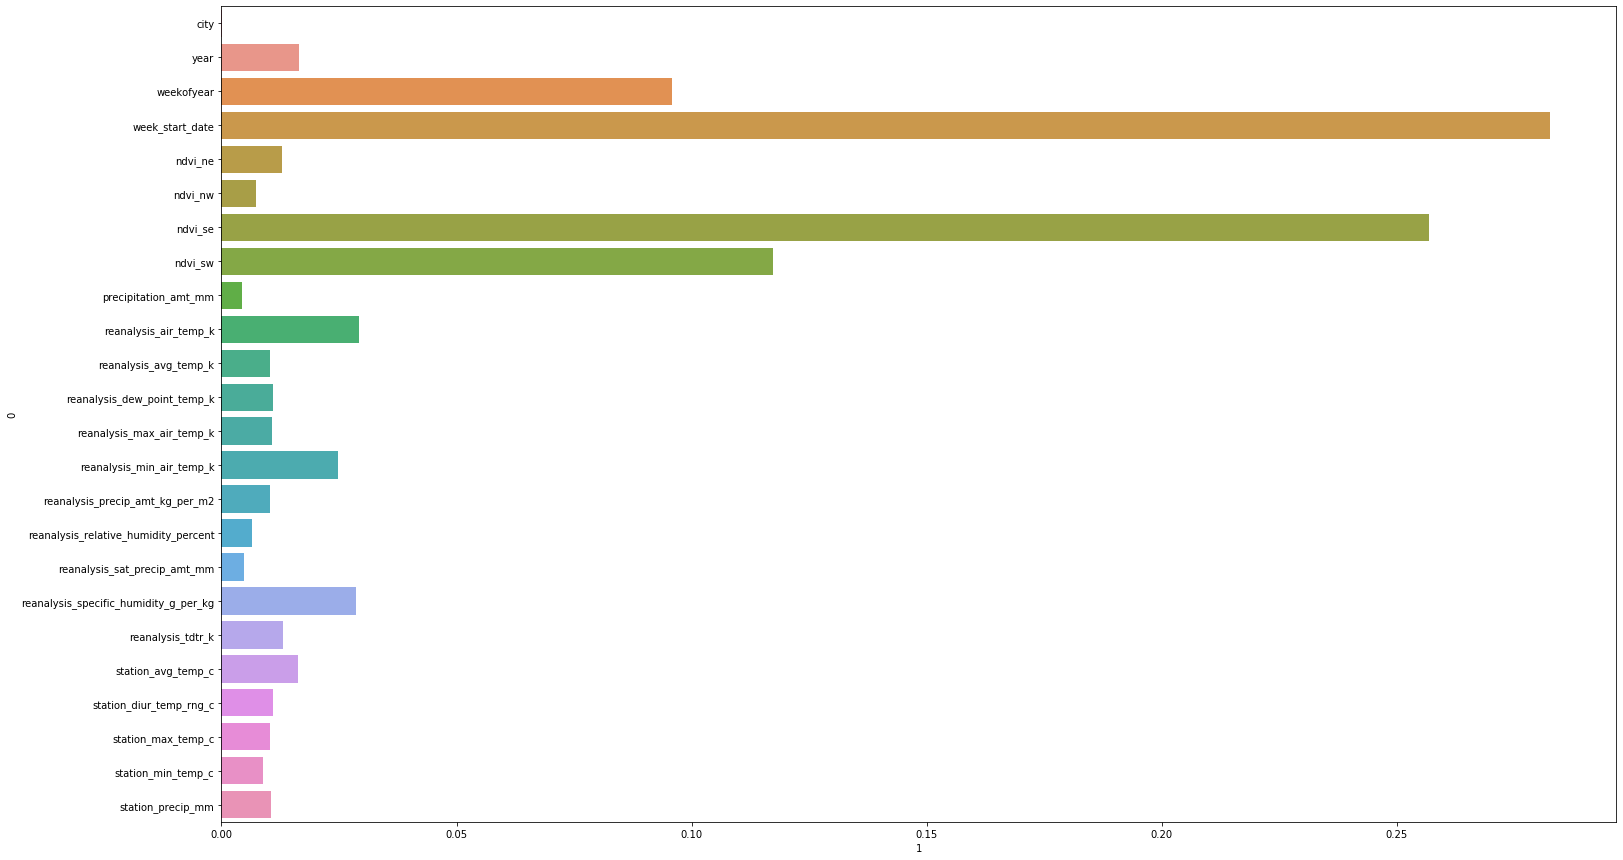

In [0]:
feature_stuff = pd.DataFrame(zip(X_train.columns, rnd_reg.feature_importances_))
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x=1, y=0, data=feature_stuff, label="Feature Importances")

In [0]:
rnd_reg_final = RandomForestRegressor(n_estimators=25000, n_jobs=-1, verbose=1, min_samples_split=3, random_state=42)
rnd_reg_final.fit(data_features, data_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 11246 tasks  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=25000,
                      n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                      warm_start=False)

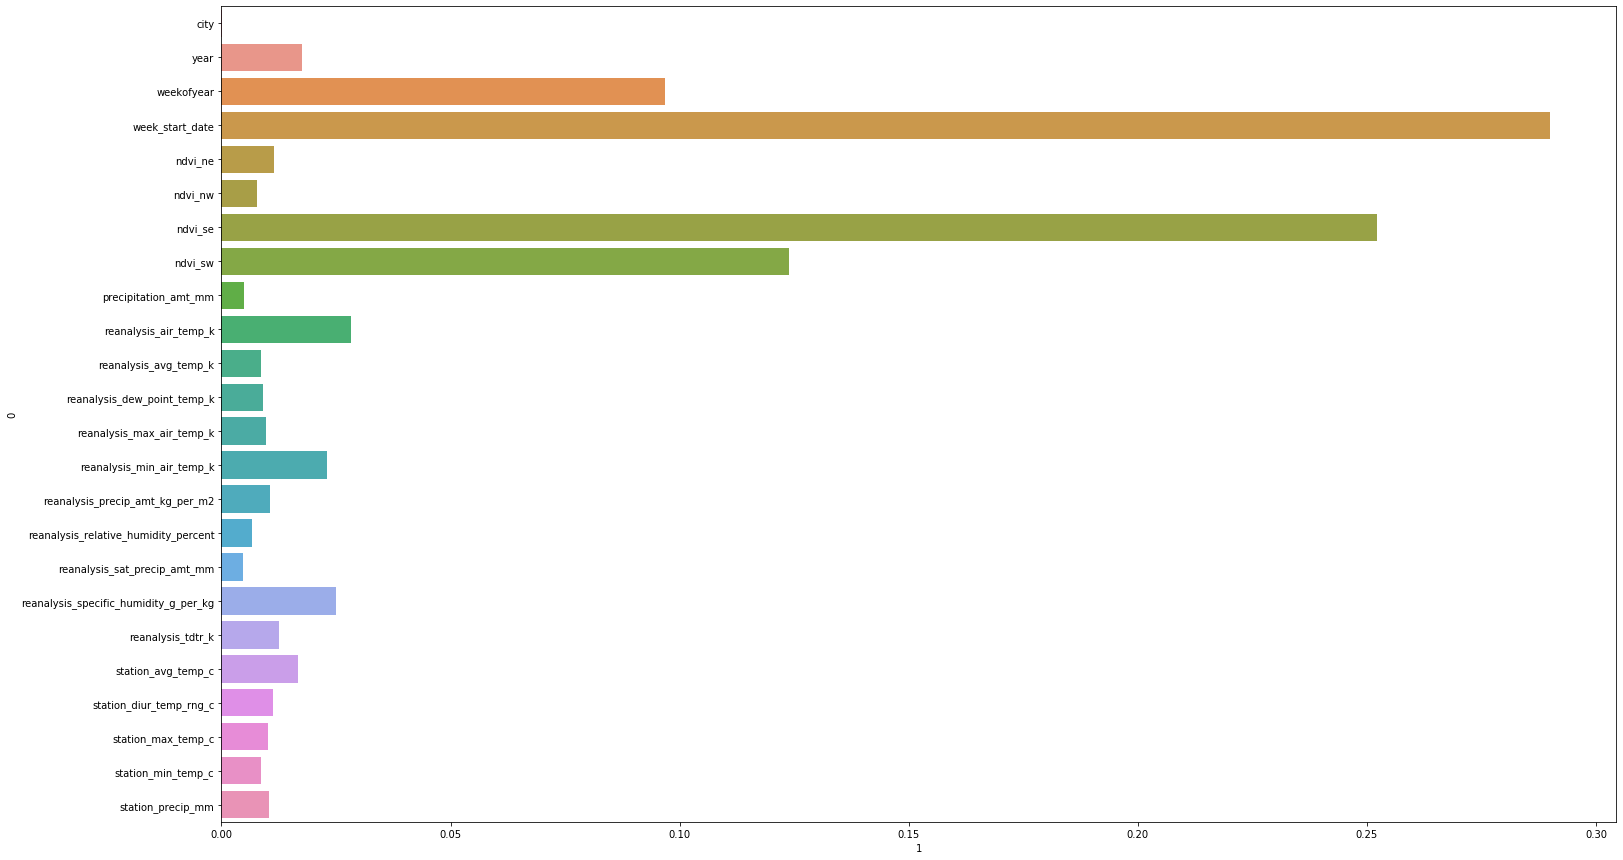

In [0]:
feature_stuff = pd.DataFrame(zip(data_features.columns, rnd_reg_final.feature_importances_))
ax, f = plt.subplots(figsize=(25, 15))
sns.barplot(x=1, y=0, data=feature_stuff, label="Feature Importances")

In [0]:
#data_test.city = data_test.city.map({'sj':0, 'iq':1})
Y_pred_rnd_reg = rnd_reg_final.predict(data_test)
Y_pred = np.round(Y_pred_rnd_reg).astype(int)
Y_preds = []
for i in Y_pred:
  if i<0:
    print('PREDICTION UNDER 0 -> ', i)
    Y_preds.append(0)
  else:
    Y_preds.append(i)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 9796 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 11246 tasks      | elapsed:  

In [0]:
data_test.city = data_test.city.map({0:'sj', 1:'iq'})
submission = pd.DataFrame({
    "city": data_test["city"], 
    "year": data_test["year"], 
    "weekofyear": data_test["weekofyear"], 
    "total_cases": Y_preds, 
    })
submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,6
2,sj,2008,20,6
3,sj,2008,21,9
4,sj,2008,22,11


In [0]:
submission.to_csv('DISEASE_PREDICTION_SUBMISSION_V3.csv', index=False)

In [0]:
from google.colab import files
files.download('DISEASE_PREDICTION_SUBMISSION_V3.csv')